## Capstone Project - The Battle of Neighborhoods

### Find the potential location for a new gym in Stuttgart, Germany
Zebin Cao, 16.07.2020

### 1. Introduction

Stuttgart is located in southwestern Germany, with a population of more than 600 thousand [1]. With this high population, the need to find an appropriate gym for working out is increasing. Different from other categories of venues, people tend to choose one gym, and the possibility to change gyms is low. The distance of gym to customers and the gym number around the customers are critical. Therefore, this Capstone Project aims to find the potential location to open a new gym in Stuttgart. 

In [1]:
# Download all the dependencies
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library



print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [2]:
conda install openpyxl

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         125 KB
    certifi-2020.6.20          |           py36_0         156 KB
    et_xmlfile-1.0.1           |          py_1001          12 KB
    jdcal-1.4.1                |             py_0          11 KB
    openpyxl-3.0.4             |             py_0         157 KB
    openssl-1.1.1g             |       h7b6447c_0         2.5 MB
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  et_xmlfile         pkgs/main/noarch::et_xmlfile-1.0.1-py_1001
  jdcal              pkgs/main/noarch::jdcal-1.4.1-py_0
  openpyxl         

### 2. Data

#### 2.1 Data sources

In [3]:
dls = "https://www.domino1.stuttgart.de/web/komunis/komunissde.nsf/a9830f07fd8c0e7dc1257cb70033e711/93b78f94cf10ec41c125851a002bb4e2/$FILE/btp01_.XLSX"
resp = requests.get(dls)

output = open('btp01_.xlsx', 'wb')
output.write(resp.content)
output.close()

df = pd.read_excel('btp01_.xlsx', sheet_name = 'Mai')
df=pd.DataFrame(df)

##### 2.2 Data cleaning

In [4]:
df.drop(df.index[0:7], inplace = True)
df = df.reset_index(drop=True) # reorder the index
df.head()

,Tabelle Nr. 12217,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,insgesamt,männlich,weiblich,Deutsche,Ausländer,insgesamt,Deutsche,Ausländer
1,Mitte,101 Oberer Schlossgarten,382,193,189,318,64,-8,-2,-6
2,NaN,102 Rathaus,3968,2058,1910,2331,1637,16,25,-9
3,NaN,103 Neue Vorstadt,1328,757,571,820,508,-27,-12,-15
4,NaN,104 Universität,702,353,349,422,280,-14,-6,-8


In [5]:
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header


In [6]:
df.columns.values[[0, 1, 2]] = ['Borough', 'Neighborhood','Population'] # reset the column names of first three columns
df=df[['Borough', 'Neighborhood','Population']]
df = df.reset_index(drop=True) # reorder the index
df.head()

,Borough,Neighborhood,Population
0,Mitte,101 Oberer Schlossgarten,382
1,NaN,102 Rathaus,3968
2,NaN,103 Neue Vorstadt,1328
3,NaN,104 Universität,702
4,NaN,105 Europaviertel,995


In [7]:
df.tail(10)

,Borough,Neighborhood,Population
167,NaN,881 Rot,10518
168,NaN,891 Zazenhausen,3771
169,,Z u s a m m e n,38676
170,Landeshauptstadt Stuttgart,NaN,612543
171,NaN,NaN,NaN
172,1 Einschließlich 128 Am Rosensteinpark.,NaN,NaN
173,2 Einschließlich 191 Wildpark.,NaN,NaN
174,3 Einschließlich 666 Bruckwiesen.,NaN,NaN
175,NaN,NaN,NaN
176,Weitere Informationen zur Einwohnerentwicklung...,NaN,NaN


In [8]:
df.drop(df.tail(7).index,inplace=True)
df.tail(10)

,Borough,Neighborhood,Population
160,NaN,863 Zuf.-Elbelen,758
161,NaN,864 Zuf.-Frauensteg,1358
162,NaN,865 Zuf.-Mitte,6534
163,NaN,866 Zuf.-Hohenstein,3893
164,NaN,867 Zuf.-Mönchsberg,4350
165,NaN,868 Zuf.-Im Raiser,1453
166,NaN,871 Neuwirtshaus,824
167,NaN,881 Rot,10518
168,NaN,891 Zazenhausen,3771
169,,Z u s a m m e n,38676


In [9]:
df.fillna(0, inplace=True)


In [10]:
pd.options.mode.chained_assignment = None 

In [11]:
i=1
while i < len(df):
    if df['Borough'].iloc[i] == 0:
        df['Borough'].iloc[i] =  df['Borough'].iloc[i-1] # fill the empty cell with borough
    i+=1


In [12]:
i=1
while i < len(df):
    if df['Neighborhood'].iloc[i] == 'Z u s a m m e n':
        df['Borough'].iloc[i] =  df['Borough'].iloc[i-1] # fill a few remaining empty cell with borough
    i+=1
df.head()

,Borough,Neighborhood,Population
0,Mitte,101 Oberer Schlossgarten,382
1,Mitte,102 Rathaus,3968
2,Mitte,103 Neue Vorstadt,1328
3,Mitte,104 Universität,702
4,Mitte,105 Europaviertel,995


In [13]:
df['Borough'].iloc[0:48] = 'Stuttgart-' + df['Borough'].iloc[0:48].astype(str) # add 'Stuttgart-' to the boroughs in the city center
df.Neighborhood = df.Neighborhood.str.replace('\d+', '') # remove the numbers in Neighborhood
df['Neighborhood'] = df['Neighborhood'].str.replace(r'Zuf.-', '') # remove the str 'Zuf.-' in some neighborhoods
df.head()

,Borough,Neighborhood,Population
0,Stuttgart-Mitte,Oberer Schlossgarten,382
1,Stuttgart-Mitte,Rathaus,3968
2,Stuttgart-Mitte,Neue Vorstadt,1328
3,Stuttgart-Mitte,Universität,702
4,Stuttgart-Mitte,Europaviertel,995


In [14]:
# Obtain the first sub dataframe with borough and population
borough_list=[] 
i=1
while i < len(df):
    if df['Borough'].iloc[i-1] != df['Borough'].iloc[i]:
        bor=df['Borough'].iloc[i-1]
        pop=df['Population'].iloc[i-1]
        borough_list.append([(bor, pop)]) 
    i+=1

borough_list.append([(df['Borough'].iloc[i-1], df['Population'].iloc[i-1])])

df_bor = pd.DataFrame([item for borough_list in borough_list for item in borough_list])
df_bor.columns = ['Borough','Population']
    
df_bor.head()

,Borough,Population
0,Stuttgart-Mitte,23956
1,Stuttgart-Nord,27629
2,Stuttgart-Ost,48730
3,Stuttgart-Süd,44050
4,Stuttgart-West,52668


In [15]:
# obtain the second sub dataframe with neighborhood and population
df_nei = df[df.Neighborhood != 'Z u s a m m e n']
df_nei.reset_index(drop=True) # reorder the index
df_nei.head()

,Borough,Neighborhood,Population
0,Stuttgart-Mitte,Oberer Schlossgarten,382
1,Stuttgart-Mitte,Rathaus,3968
2,Stuttgart-Mitte,Neue Vorstadt,1328
3,Stuttgart-Mitte,Universität,702
4,Stuttgart-Mitte,Europaviertel,995


### 3. Methodology and results

In [16]:
df_bor["Latitude"], df_bor["Longitude"] = None, None
df_bor.head()

,Borough,Population,Latitude,Longitude
0,Stuttgart-Mitte,23956,None,None
1,Stuttgart-Nord,27629,None,None
2,Stuttgart-Ost,48730,None,None
3,Stuttgart-Süd,44050,None,None
4,Stuttgart-West,52668,None,None


In [17]:
# function to obtain latitude and longitude
def loc(Bor): 
    try: 
        address= Bor + ', Stuttgart, Germany' 
        geolocator = Nominatim(user_agent="STR_explorer") 
        location = geolocator.geocode(address)
        lat = location.latitude
        lon = location.longitude
        return lat, lon
        
    except:
        return None

In [18]:
# obtain the location data of borough
i = 0
while i < len(df_bor):
    df_bor['Latitude'].iloc[i], df_bor['Longitude'].iloc[i] = loc(df_bor['Borough'].iloc[i])
    i = i + 1
df_bor.head()



,Borough,Population,Latitude,Longitude
0,Stuttgart-Mitte,23956,48.7759,9.1798
1,Stuttgart-Nord,27629,48.7967,9.17625
2,Stuttgart-Ost,48730,48.777,9.20736
3,Stuttgart-Süd,44050,48.753,9.13249
4,Stuttgart-West,52668,48.7777,9.15135


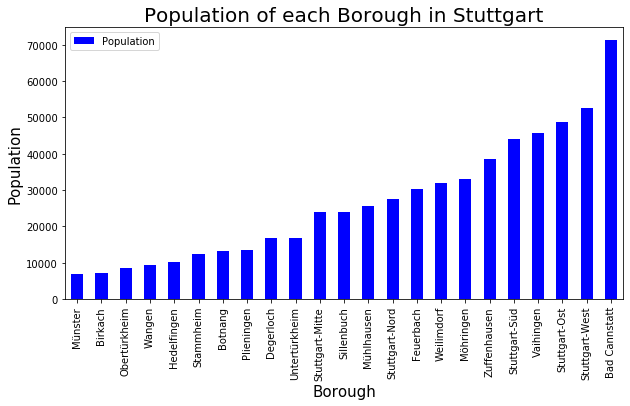

In [19]:
# plot the population of boroughs
df_bor.sort_values(by='Population', ascending=True, inplace=True)

df_bor.plot.bar(x="Borough", y="Population", figsize=(10,5), color = 'Blue')
plt.title('Population of each Borough in Stuttgart', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Population', fontsize=15)
plt.show()


In [20]:
# function to obtain latitude and longitude for second sub dataframe
def loca(Nei, Bor): 
    try: 
        address= Nei + ', ' + Bor + ', Stuttgart, Germany' 
        geolocator = Nominatim(user_agent="ßß") 
        location = geolocator.geocode(address)
        lat = location.latitude
        lon = location.longitude
        return lat, lon
    except:
        return None

In [21]:
df_nei["Latitude"], df_nei["Longitude"] = None, None

i = 0
while i < len(df_nei):
    df_nei['Latitude'].iloc[i], df_nei['Longitude'].iloc[i] = loca(df_nei['Neighborhood'].iloc[i],df_nei['Borough'].iloc[i])
    i = i + 1
df_nei.head()

,Borough,Neighborhood,Population,Latitude,Longitude
0,Stuttgart-Mitte,Oberer Schlossgarten,382,48.7803,9.18286
1,Stuttgart-Mitte,Rathaus,3968,48.7738,9.17716
2,Stuttgart-Mitte,Neue Vorstadt,1328,48.7769,9.17181
3,Stuttgart-Mitte,Universität,702,48.7811,9.17154
4,Stuttgart-Mitte,Europaviertel,995,48.7887,9.18272


In [22]:
# Define Foursquare Credentials and Version
# the ID and SECRET were hidden for privacy

CLIENT_ID = '##########' # your Foursquare ID
CLIENT_SECRET = '#############' # your Foursquare Secret
VERSION = '20200712' # Foursquare API version


In [23]:
# Explore the gyms around 5 km of each neighborhood

categoryId = '4bf58dd8d48988d175941735' #gym/fitness
def getNearbygym(boroughs, names, latitudes, longitudes, radius=5000, limit=100):
    
    venues_list=[]
    for borough, name, lat, lng in zip(boroughs, names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            categoryId,
            radius, 
            limit)
        
       # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                             'Neighborhood', 
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [24]:
# obtain all the gym related venues
Str_gym = getNearbygym(boroughs=df_nei['Borough'],
                       names=df_nei['Neighborhood'],
                       latitudes=df_nei['Latitude'],
                       longitudes=df_nei['Longitude']
                                  )

print(Str_gym.shape)


(5377, 8)


In [25]:
# only pick up the gym or Gym / Fitness Center
str_gym = Str_gym.loc[Str_gym['Venue Category'].isin(['Gym', 'Gym / Fitness Center'])] 
str_gym = str_gym.reset_index(drop=True) # reorder the index
str_gym.shape
str_gym.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Stuttgart-Mitte,Oberer Schlossgarten,48.780313,9.182857,puls fit & wellnessclub,48.779840,9.166798,Gym / Fitness Center
1,Stuttgart-Mitte,Oberer Schlossgarten,48.780313,9.182857,Elements,48.769818,9.173003,Gym / Fitness Center
2,Stuttgart-Mitte,Oberer Schlossgarten,48.780313,9.182857,heldenhalle by Move Factory,48.769585,9.162011,Gym
3,Stuttgart-Mitte,Oberer Schlossgarten,48.780313,9.182857,puls fit & wellnessclub,48.747547,9.163497,Gym / Fitness Center
4,Stuttgart-Mitte,Oberer Schlossgarten,48.780313,9.182857,JONNY M. Women Fitness,48.781652,9.177136,Gym


In [26]:
# find out the gym numbers of each borough
grouped_df = str_gym.groupby("Borough")  

grouped_df = grouped_df.agg({"Venue Latitude": "nunique"}) 

grouped_df = grouped_df.reset_index()

grouped_df.rename(columns={"Venue Latitude": "Gym number"}, inplace=True)
grouped_df.sort_values(by='Gym number', ascending=True, inplace=True)
grouped_df.head()

,Borough,Gym number
21,Weilimdorf,16
10,Plieningen,16
12,Stammheim,17
9,Obertürkheim,17
1,Birkach,20


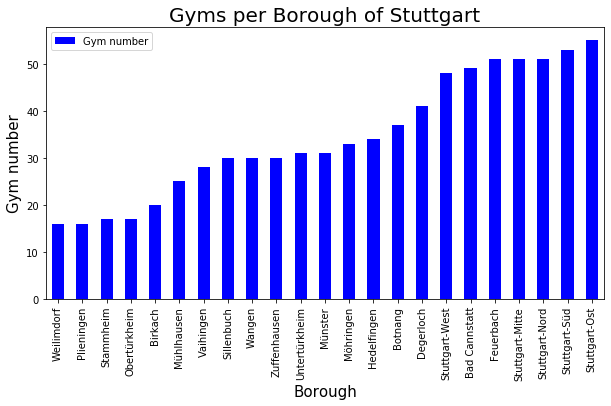

In [27]:
# plot the gym number of each borough
grouped_df.plot.bar(x="Borough", y="Gym number", figsize=(10,5), color = 'Blue')
plt.title('Gyms per Borough of Stuttgart', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Gym number', fontsize=15)
plt.show()


In [28]:
# calculate the gym to population ratio (gym number/10000 people)
df_ratio=pd.merge(df_bor, grouped_df, how='left',on=['Borough']) #https://realpython.com/pandas-merge-join-and-concat/
df_ratio.rename(columns={"Venue Latitude": "Gym number"}, inplace=True)
df_ratio['Gym ratio']=df_ratio['Gym number']/df_ratio['Population']*10000
df_ratio.sort_values(by='Gym ratio', ascending=True, inplace=True)
df_ratio.head()


,Borough,Population,Latitude,Longitude,Gym number,Gym ratio
15,Weilimdorf,31873,48.8153,9.11244,16,5.019923
19,Vaihingen,45835,48.7344,9.08865,28,6.108869
22,Bad Cannstatt,71285,48.8049,9.21468,49,6.873816
17,Zuffenhausen,38676,48.8313,9.16744,30,7.756748
21,Stuttgart-West,52668,48.7777,9.15135,48,9.113693


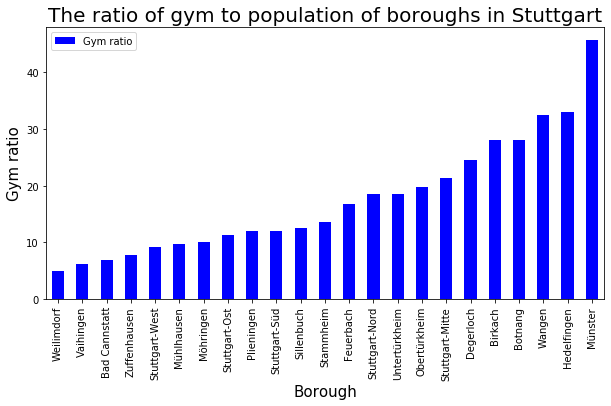

In [29]:
# plot the gym to population ratio 
df_ratio.plot.bar(x="Borough", y="Gym ratio", figsize=(10,5), color = 'Blue')
plt.title('The ratio of gym to population of boroughs in Stuttgart', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Gym ratio', fontsize=15)
plt.show()

#### Weilimdorf is chosen for further analysis due to the lowest gym to population ratio.

In [30]:
# Explore Weilimdorf, Stuttgart

df_wd=df_nei.loc[df_nei['Borough'] == 'Weilimdorf']
df_wd.to_excel("weilimdorf.xlsx")  
df_wd


,Borough,Neighborhood,Population,Latitude,Longitude
151,Weilimdorf,Weilimdorf,16757,48.8153,9.11244
152,Weilimdorf,Weilimdorf-Nord,587,48.8268,9.09761
153,Weilimdorf,Bergheim,2954,48.8013,9.0897
154,Weilimdorf,Giebel,5190,48.8046,9.09004
155,Weilimdorf,Hausen,3415,48.8165,9.08672
156,Weilimdorf,Wolfbusch,2970,48.8052,9.10859


In [31]:
# explore the gyms within 1 km of each neighborhood in Weilimdorf
def getNearbygym_nei(boroughs, names, latitudes, longitudes, radius=1000, limit=100):
    
    venues_list=[]
    for borough, name, lat, lng in zip(boroughs, names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            categoryId,
            radius, 
            limit)
        
       # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                             'Neighborhood', 
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [32]:
wd_gym = getNearbygym_nei(boroughs=df_wd['Borough'],
                       names=df_wd['Neighborhood'],
                       latitudes=df_wd['Latitude'],
                       longitudes=df_wd['Longitude']
                                  )



wd_gym = wd_gym.loc[wd_gym['Venue Category'].isin(['Gym', 'Gym / Fitness Center'])] 
wd_gym = wd_gym.reset_index(drop=True) # reorder the index
wd_gym



,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Weilimdorf,Weilimdorf,48.815276,9.112444,Crossfit Werk Stuttgart,48.822845,9.112338,Gym / Fitness Center
1,Weilimdorf,Weilimdorf-Nord,48.826809,9.097611,Mini Gym,48.821278,9.094337,Gym / Fitness Center
2,Weilimdorf,Weilimdorf-Nord,48.826809,9.097611,Lifestyle Fitness Club,48.823509,9.101341,Gym
3,Weilimdorf,Weilimdorf-Nord,48.826809,9.097611,Fitness Forum,48.823664,9.102083,Gym
4,Weilimdorf,Hausen,48.816454,9.086722,Mini Gym,48.821278,9.094337,Gym / Fitness Center


In [33]:
#create the map of Weilimdorf, Stuttgart
geolocator = Nominatim(user_agent="STR_explorer") 
location = geolocator.geocode('Weilimdorf, Stuttgart, Germany')
lat_wd=location.latitude
lon_wd=location.longitude
wd_map=folium.Map(location=[lat_wd, lon_wd],zoom_start=14)
wd_map

In [34]:
# plot the gyms of Weilimdorf in the map
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(wd_gym['Venue Latitude'], wd_gym['Venue Longitude']):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(wd_gym['Venue Latitude'])
longitudes = list(wd_gym['Venue Longitude'])
labels = list(wd_gym.Venue)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(wd_map)    
    
# add incidents to map
wd_map.add_child(incidents)


#### The ideal location for a new gym is in Giebel, Weilimdorf.  

### 4. Conclusion
There are more gyms in or near the Stuttgart city center. The high number of gyms will have more competition among the gyms. This study focuses on the gym to population ratio of each borough and finds Weilimdorf has the lowest ratio. The ideal location for a new gym is Giebel, Weilimdorf, due to the low surrounding gym density and relatively high population. However, this project is depending on the adequacy and accuracy of the Foursquare API. More analyses are still needed to determine the optimal location for a new gym. 

### Reference
[1] https://en.wikipedia.org/wiki/Stuttgart    
[2] File name: btp01_ 
Link: https://www.domino1.stuttgart.de/web/komunis/komunissde.nsf/a9830f07fd8c0e7dc1257cb70033e711/93b78f94cf10ec41c125851a002bb4e2?OpenDocument


#### Referred materials      
https://stackoverflow.com/questions/25415405/downloading-an-excel-file-from-the-web-in-python    
https://intellipaat.com/community/32871/python-pandas-replacing-header-with-top-row    
https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas    
https://stackoverflow.com/questions/20025882/add-a-string-prefix-to-each-value-in-a-string-column-using-pandas    
https://stackoverflow.com/questions/41719259/how-to-remove-numbers-from-string-terms-in-a-pandas-dataframe    
https://www.interviewqs.com/ddi_code_snippets/rows_cols_python    
https://kite.com/python/answers/how-to-count-unique-values-in-a-pandas-dataframe-group-in-python#:~:text=Counting%20the%20number%20of%20unique,within%20each%20of%20these%20groups.    
https://www.interviewqs.com/ddi_code_snippets/rows_cols_python    